In [241]:
!pip3 install imblearn

In [261]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE

In [278]:
df = pd.read_csv("tips.csv")

In [279]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [280]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [281]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [282]:
df[["sex", "smoker", "day", "time"]].describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


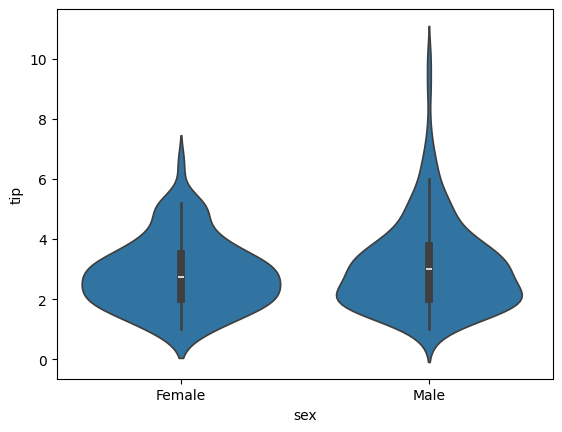

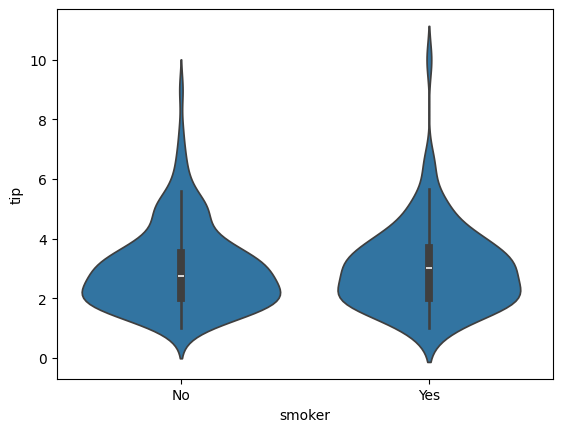

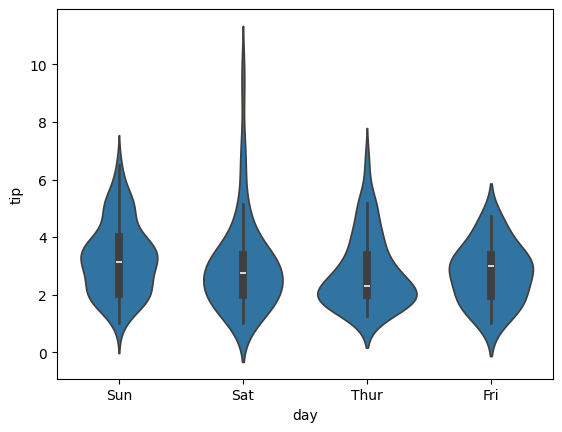

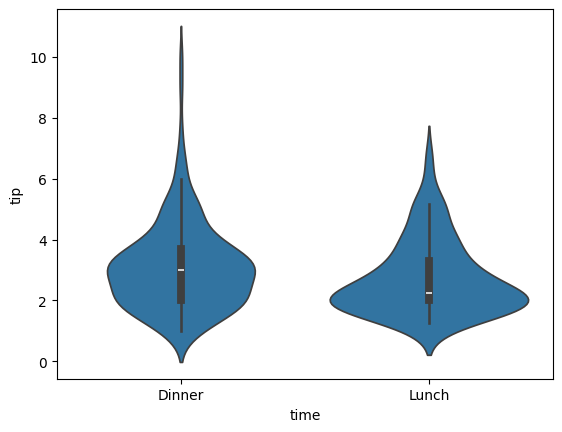

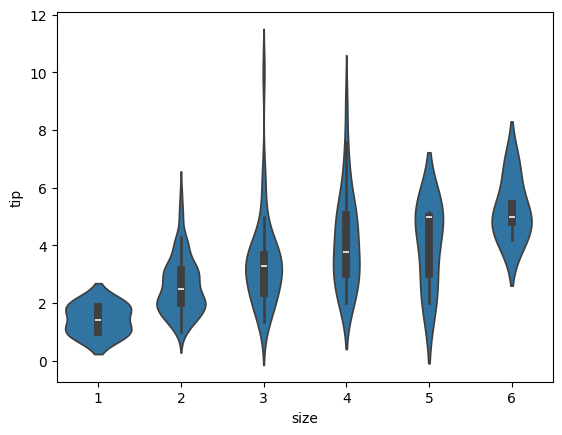

In [283]:
for i in ["sex", "smoker", "day", "time", "size"]:
    sns.violinplot(x=i, y="tip", data=df)
    plt.show()

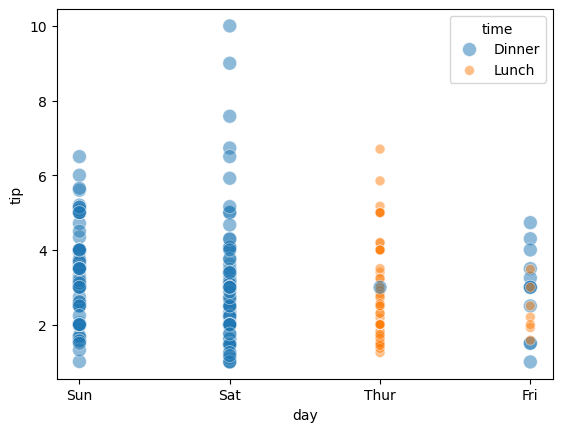

<Axes: xlabel='day', ylabel='count'>

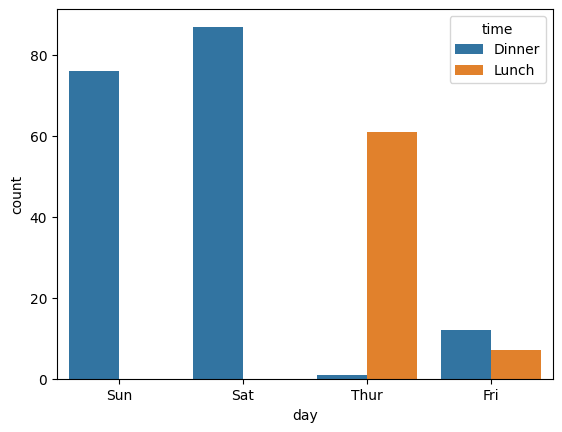

In [284]:
sns.scatterplot(x="day", y="tip", data=df, size="time", hue="time", alpha=0.5, sizes=(50, 100))
plt.show()
sns.countplot(x="day", data=df, hue="time")

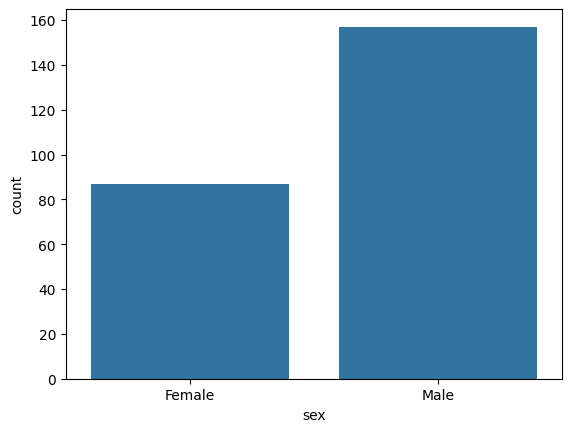

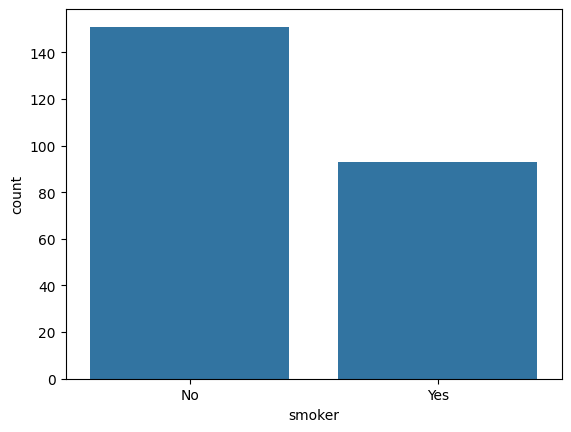

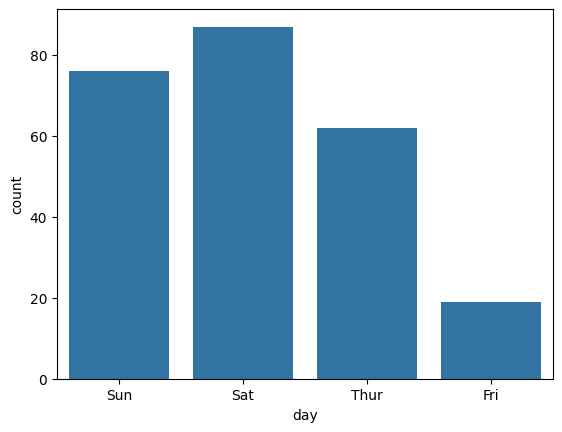

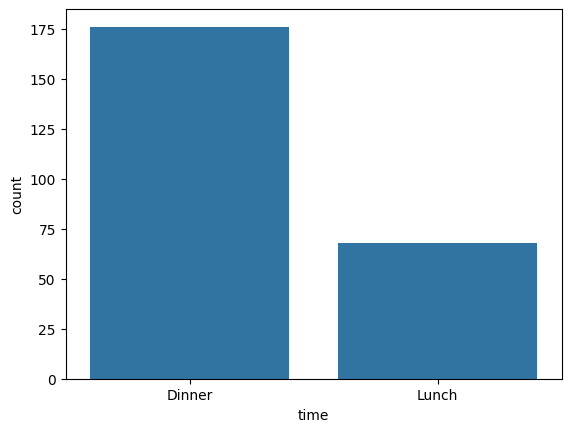

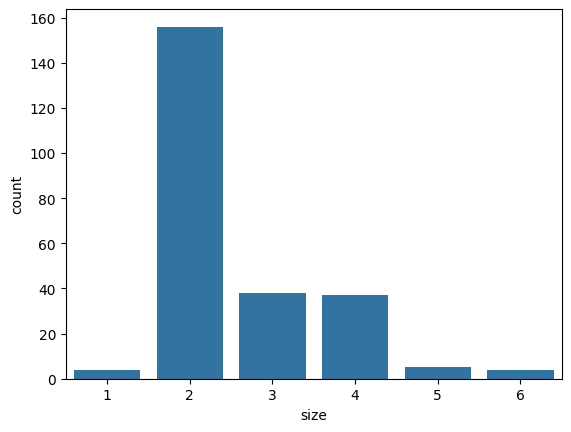

In [285]:
for i in ["sex", "smoker", "day", "time", "size"]:
    sns.countplot(x=i, data=df)
    plt.show()

In [286]:
df["sex"] = df["sex"].map({"Female": 0, "Male": 1})
df["smoker"] = df["smoker"].map({"No": 0, "Yes": 1})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})

In [287]:
df["tip"] = np.log(df["tip"])
df["total_bill"] = np.log(df["total_bill"])

In [288]:
df.describe()

,total_bill,tip,sex,smoker,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,2.890310,1.002538,0.643443,0.381148,0.721311,2.569672
std,0.438876,0.436161,0.479967,0.486667,0.449276,0.951100
min,1.121678,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.591325,0.693147,0.000000,0.000000,0.000000,2.000000
50%,2.878917,1.064687,1.000000,0.000000,1.000000,2.000000
75%,3.183346,1.270444,1.000000,1.000000,1.000000,3.000000
max,3.928093,2.302585,1.000000,1.000000,1.000000,6.000000


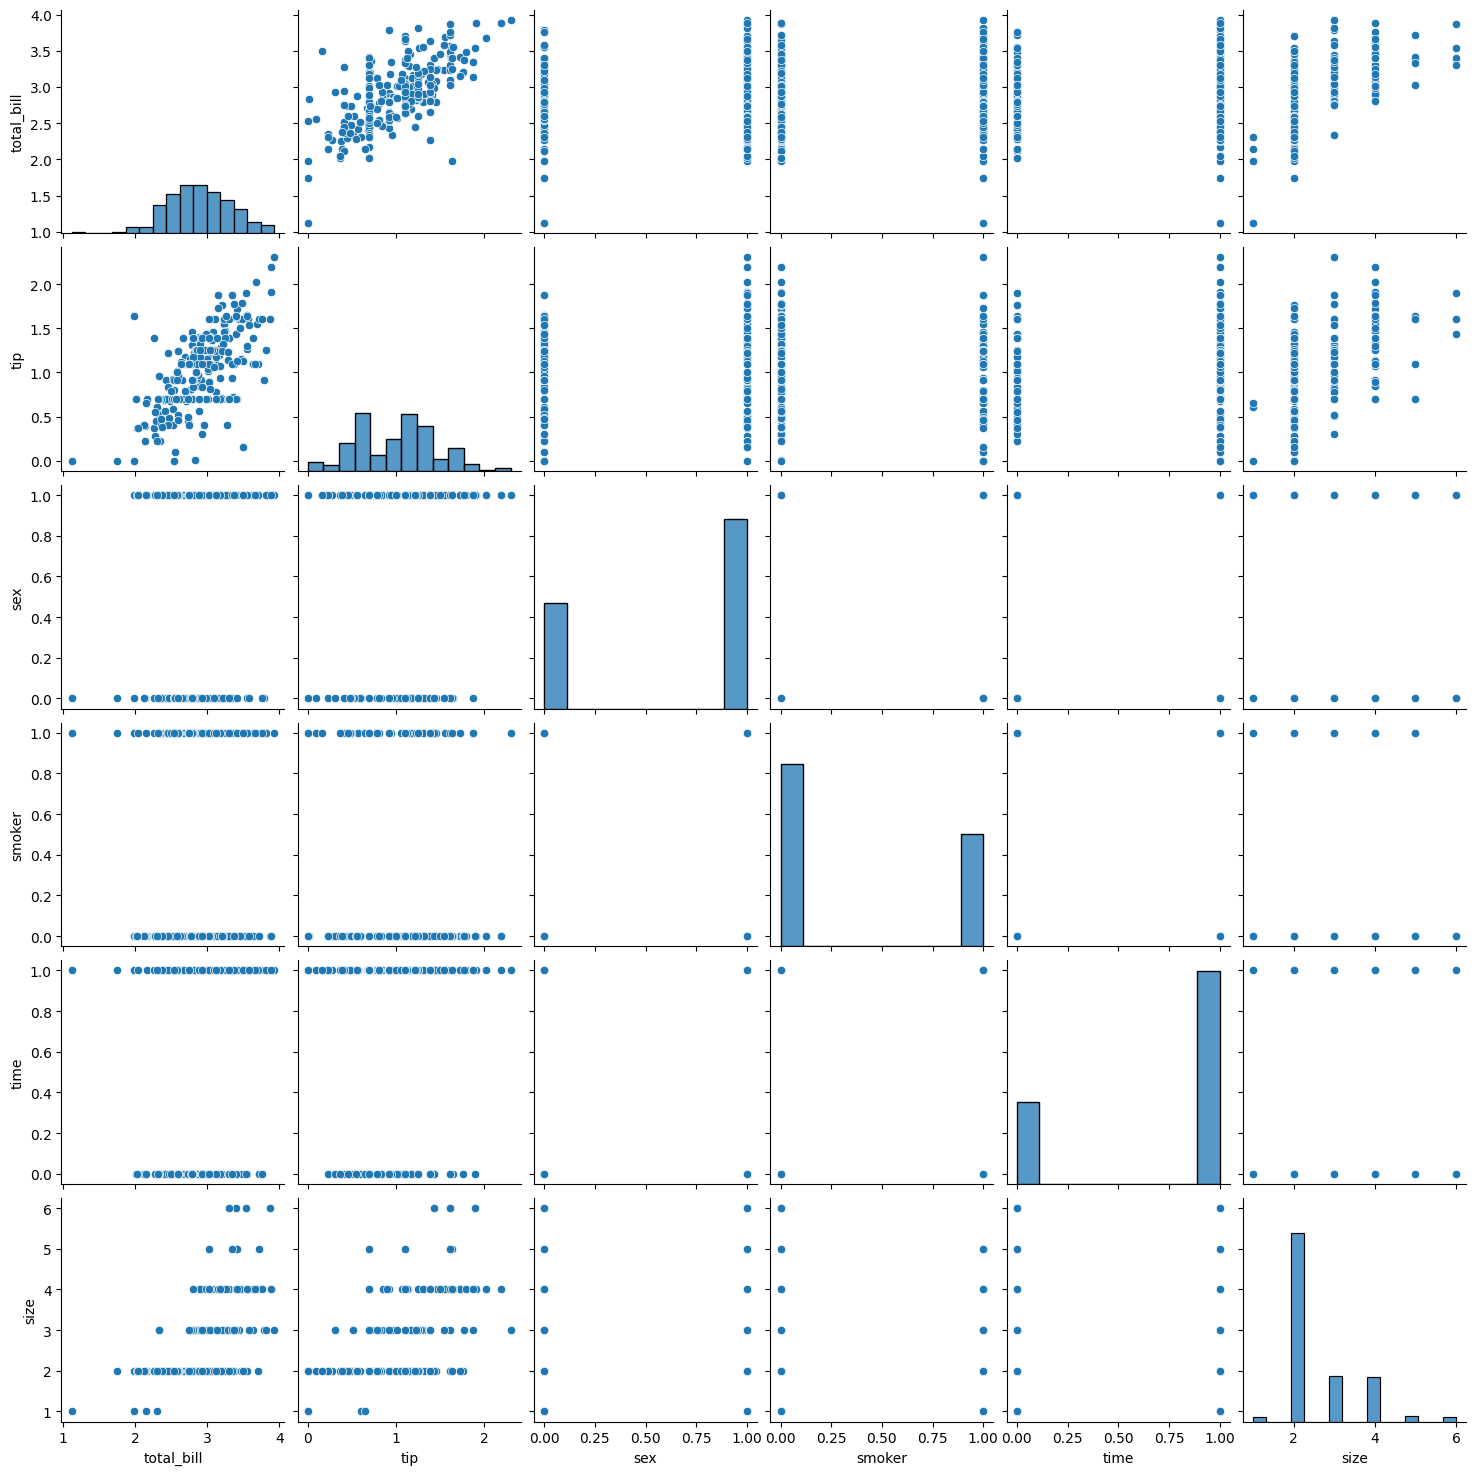

In [289]:
sns.pairplot(df)

In [290]:
print(df["day"].value_counts())
print(df["size"].value_counts())

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64


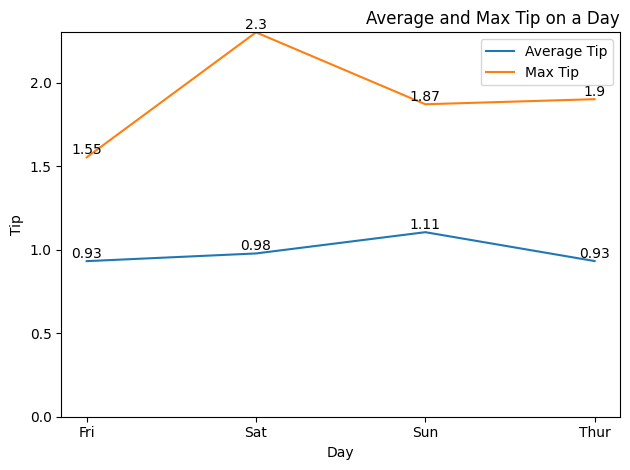

In [299]:
# Line Plot (for time-series data) average tip on a day, max tip on a day
df_day = df.groupby("day")["tip"].mean()
df_day_max = df.groupby("day")["tip"].max()
# Start y axis from 0
plt.ylim(0, df["tip"].max())
# Annotate exact values at points
for i, v in enumerate(df_day.values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
    plt.text(i, df_day_max.values[i], str(round(df_day_max.values[i], 2)), ha='center', va='bottom')
plt.plot(df_day.index, df_day.values, label="Average Tip")
plt.plot(df_day_max.index, df_day_max.values, label="Max Tip")
plt.xlabel("Day")
plt.ylabel("Tip")
plt.title("Average and Max Tip on a Day", loc="right")
plt.legend()
plt.tight_layout()
plt.show()

In [300]:
df = pd.get_dummies(df, columns=["day"])

<Axes: >

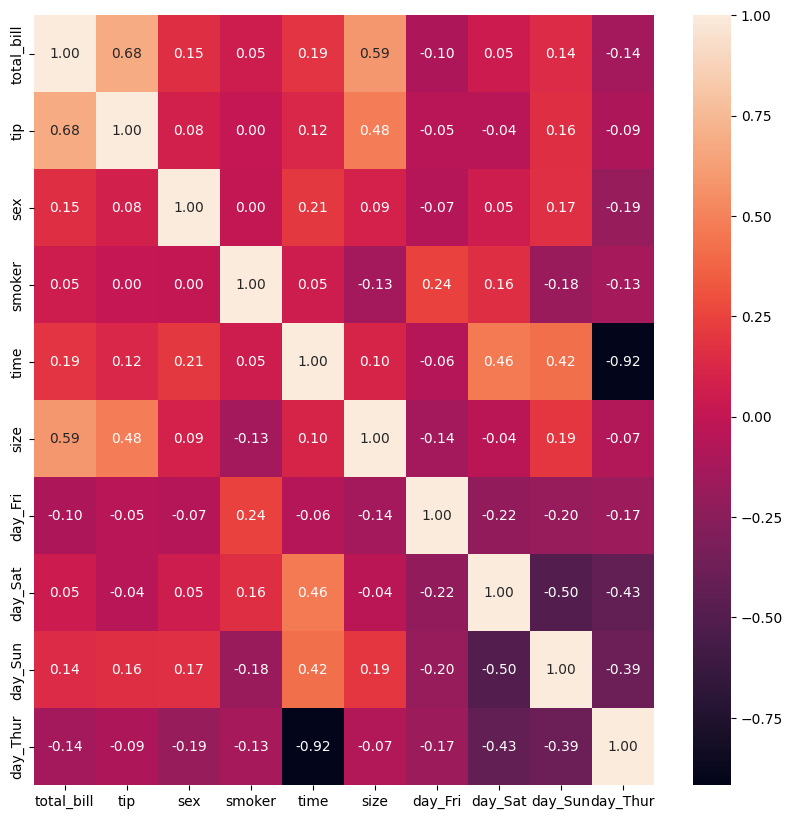

In [301]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", figure=plt.figure(figsize=(10, 10)))

In [302]:
# Rainbow test
import statsmodels.api as sm

X = df.drop("tip", axis=1)
y = df["tip"]
regressor = sm.OLS(y.astype(float), X.astype(float))
res = regressor.fit()
# print(res.summary())
rainbow_test_results = linear_rainbow(res, frac=0.5)
print(f"Rainbow Test Results (fstat, pvalue): {rainbow_test_results}")
print(res.summary())

Rainbow Test Results (fstat, pvalue): (1.3216373484477215, 0.06632793958823274)
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     26.90
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           2.14e-29
Time:                        10:44:42   Log-Likelihood:                -63.952
No. Observations:                 244   AIC:                             145.9
Df Residuals:                     235   BIC:                             177.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

As p value for rainbow test is high (0.06), we cannot reject the null hypothesis that the data is linear

In [303]:
from sklearn.inspection import permutation_importance
# Fit regressors
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=750, max_depth=3),
    "Support Vector Machine": SVR()
}
scores = {}
feature_importances = {}
residuals = {}
for regressor_name, regressor in regressors.items():
    X = df.drop("tip", axis=1)
    # X = X.drop("time", axis=1)
    y = df["tip"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

    X_train_y_train = X_train
    X_train_y_train["tip"] = y_train
    X_train_y_train, _ = SMOTE(k_neighbors=5).fit_resample(X_train_y_train, X_train_y_train["time"])
    X_train_y_train, _ = SMOTE(k_neighbors=1).fit_resample(X_train_y_train, X_train_y_train["size"])
    X_train_y_train, _ = SMOTE(k_neighbors=5).fit_resample(X_train_y_train, X_train_y_train["day_Fri"])
    # X_train_y_train, _ = SMOTE(k_neighbors=5).fit_resample(X_train_y_train, X_train_y_train["day_Sat"])
    # X_train_y_train, _ = SMOTE(k_neighbors=5).fit_resample(X_train_y_train, X_train_y_train["day_Sun"])
    # X_train_y_train, _ = SMOTE(k_neighbors=5).fit_resample(X_train_y_train, X_train_y_train["day_Thur"])
    y_train = X_train_y_train["tip"]
    X_train = X_train_y_train.drop("tip", axis=1)


    X_train = X_train.drop(["time"], axis=1) # day_Sun
    X_test = X_test.drop(["time"], axis=1) # day_Sun
    print(X_train.shape, X_test.shape)
    print(X_train.columns)

    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    residuals[regressor_name] = np.exp(y_test) - np.exp(y_pred)
    print(f"{regressor_name} MSE: {mse}")
    print(f"{regressor_name} R2: {r2}")
    try:
        print(f"{regressor_name} Coefficients: {regressor.coef_ if hasattr(regressor, 'coef_') else regressor.feature_importances_}")
        feature_importances[regressor_name] = regressor.coef_ if hasattr(regressor, 'coef_') else regressor.feature_importances_
    except:
        results = permutation_importance(regressor, X_train, y_train, scoring='neg_mean_squared_error')
        print(f"{regressor_name} Coefficients: {results.importances_mean}")
        feature_importances[regressor_name] = results.importances_mean
    scores[regressor_name] = r2
    print("===================================")


(2532, 8) (25, 8)
Index(['total_bill', 'sex', 'smoker', 'size', 'day_Fri', 'day_Sat', 'day_Sun',
       'day_Thur'],
      dtype='object')
Linear Regression MSE: 0.072447117526001
Linear Regression R2: 0.6636613580382069
Linear Regression Coefficients: [ 0.5644836  -0.02021248  0.07605324  0.09288299 -0.2500915  -0.37762946
 -0.19025598 -0.27023827]
(2296, 8) (25, 8)
Index(['total_bill', 'sex', 'smoker', 'size', 'day_Fri', 'day_Sat', 'day_Sun',
       'day_Thur'],
      dtype='object')
Ridge Regression MSE: 0.08006750424521558
Ridge Regression R2: 0.6282834077775294
Ridge Regression Coefficients: [ 0.53678732  0.00389991  0.06372573  0.08665266 -0.02707194 -0.31091544
 -0.10973468 -0.10601208]
(2372, 8) (25, 8)
Index(['total_bill', 'sex', 'smoker', 'size', 'day_Fri', 'day_Sat', 'day_Sun',
       'day_Thur'],
      dtype='object')
Lasso Regression MSE: 0.22731247163748805
Lasso Regression R2: -0.05530724509629126
Lasso Regression Coefficients: [ 0.  0. -0.  0. -0. -0.  0.  0.]
(2370, 8)

In [304]:
scores

{'Linear Regression': 0.6636613580382069,
 'Ridge Regression': 0.6282834077775294,
 'Lasso Regression': -0.05530724509629126,
 'K-Nearest Neighbors': 0.6252080439090886,
 'Random Forest': 0.7154509010409388,
 'Support Vector Machine': 0.6312806981122823}

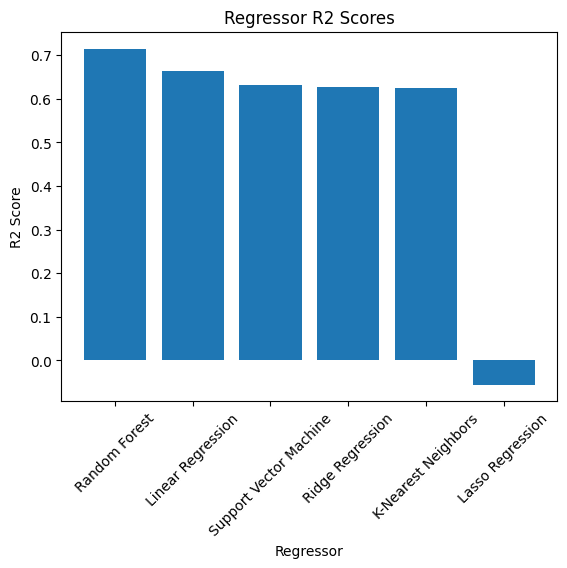

In [305]:
# scores in sorted order
sorted_scores = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))
# plot
plt.bar(sorted_scores.keys(), sorted_scores.values())
plt.xlabel("Regressor")
plt.ylabel("R2 Score")
plt.title("Regressor R2 Scores")
plt.xticks(rotation=45)
plt.show()

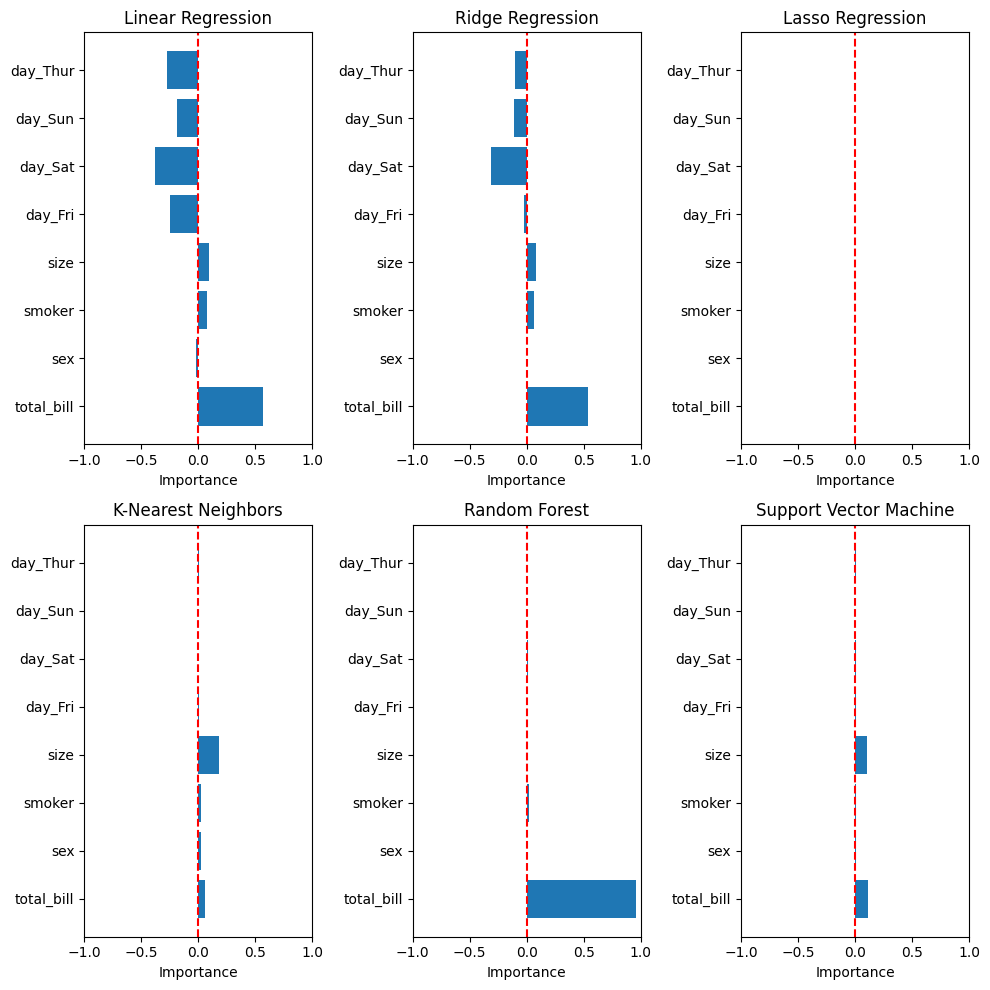

In [306]:
# Compare feature importance plots (all feature names on Y axis, and 4 vertical barplots with -1 to 1 importances on x axis)
plt.figure(figsize=(10, 10))
for i, regressor_name in enumerate(feature_importances.keys()):
    plt.subplot(2, 3, i+1)
    plt.barh(np.arange(len(feature_importances[regressor_name])), feature_importances[regressor_name])
    plt.yticks(np.arange(len(feature_importances[regressor_name])), X_train.columns)
    # Make line at 0 importance
    plt.axvline(x=0, color='r', linestyle='--')
    plt.xlim(-1, 1)
    plt.xlabel("Importance")
    plt.title(regressor_name)
plt.tight_layout()
plt.show()

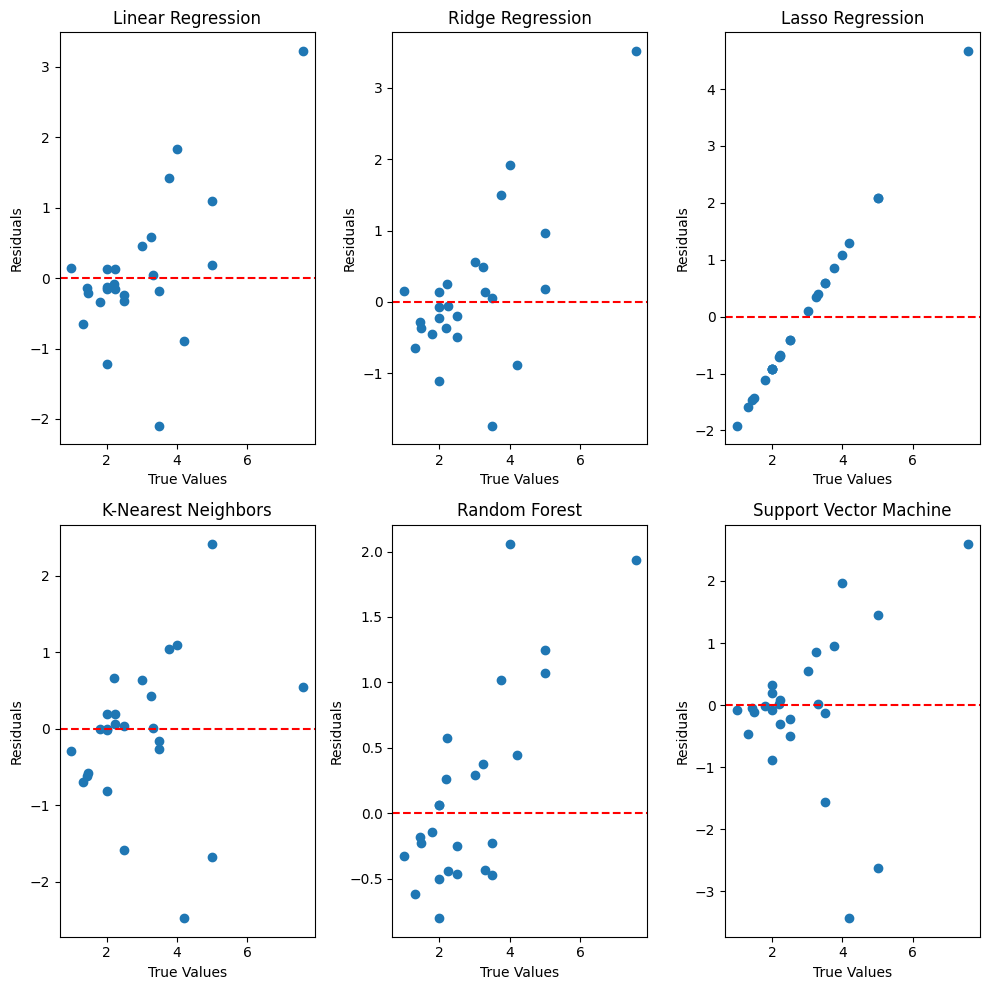

In [307]:
# Residual plots
plt.figure(figsize=(10, 10))
for i, regressor_name in enumerate(residuals.keys()):
    plt.subplot(2, 3, i+1)
    plt.scatter(np.exp(y_test), residuals[regressor_name])
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("True Values")
    plt.ylabel("Residuals")
    plt.title(regressor_name)
plt.tight_layout()
plt.show()

# Analysis and Suggestions for Business Improvement

Key Findings from the Analysis:

1. Day of the week significantly impacts tips:
   - The analysis shows a clear difference in average and maximum tips across different days.
   - Suggestion: Analyze the customer demographics and spending patterns for each day.  
     Consider targeted promotions or special offers on days with lower average tips to boost revenue.  
     Also investigate staffing levels to optimize service quality during peak days.

2. Time of day (lunch vs. dinner) influences tip amounts:
     (assuming all data for lunch and dinner is captured and both are offered on all 4 days mentioned)
   - Visualizations suggest a difference in tip amounts between lunch and dinner.
   - Suggestion: Investigate if menu pricing or service quality differs between lunch and dinner.
     Consider adjusting pricing strategies or service offerings to maximize tips during both periods.
   - Identify why lunch time on Friday/Saturday/Sunday does not have people/enough data and why dinner data is less on thursday

3. Feature Importance:
  - The analysis of feature importance from different regression models highlights the most impactful factors in predicting tip amounts.
  - Suggestion: Focus on improving the areas represented by the most important features to increase customer satisfaction and tips.
    * Total bill:  Ensure fair and competitive pricing.
    * Day of week:  Implement day-specific promotions.
    * Size of party:  Optimize service for larger groups (e.g., dedicated servers, special menus).
  - Features with negative or near-zero importance might be candidates for removal from future models to reduce complexity.

4. Model Performance:
  - The code evaluates multiple regression models to predict tip amounts.  Random Forest and potentially other models show promise.
  - Suggestion:  
    - Fine-tune the best-performing model further with more advanced hyperparameter tuning. Use cross validation to assess the model's robustness.
    - Explore other suitable regressors beyond the ones used in the provided code.
    - Continuously retrain the model with updated data to ensure its accuracy reflects current trends.

5. Residual Analysis:
    - Examination of residuals (differences between actual and predicted tip amounts) help determine model fit.
    - The residals are almost near 0 for lower tip amounts but are extremely high for larger tip amounts. This indicates more data is required where tips are higher

6. Customer Segmentation:
    - Consider segmenting customers (e.g., by day, size of party, time) to tailor strategies and understand tip behavior in each segment.

7.  Data Quality:
    - The dataset's limitations might affect the accuracy of results.
    - Suggestion: Enrich the data by adding more relevant customer attributes (e.g. age, location, frequency of visits), payment methods, and service details (e.g., server's experience) for more granular and precise analysis.

Implementation:
 - A/B test any changes to service, pricing, or promotions to gauge the actual impact on tip amounts.
 - Track key metrics over time and use statistical methods to determine if changes are significant.

